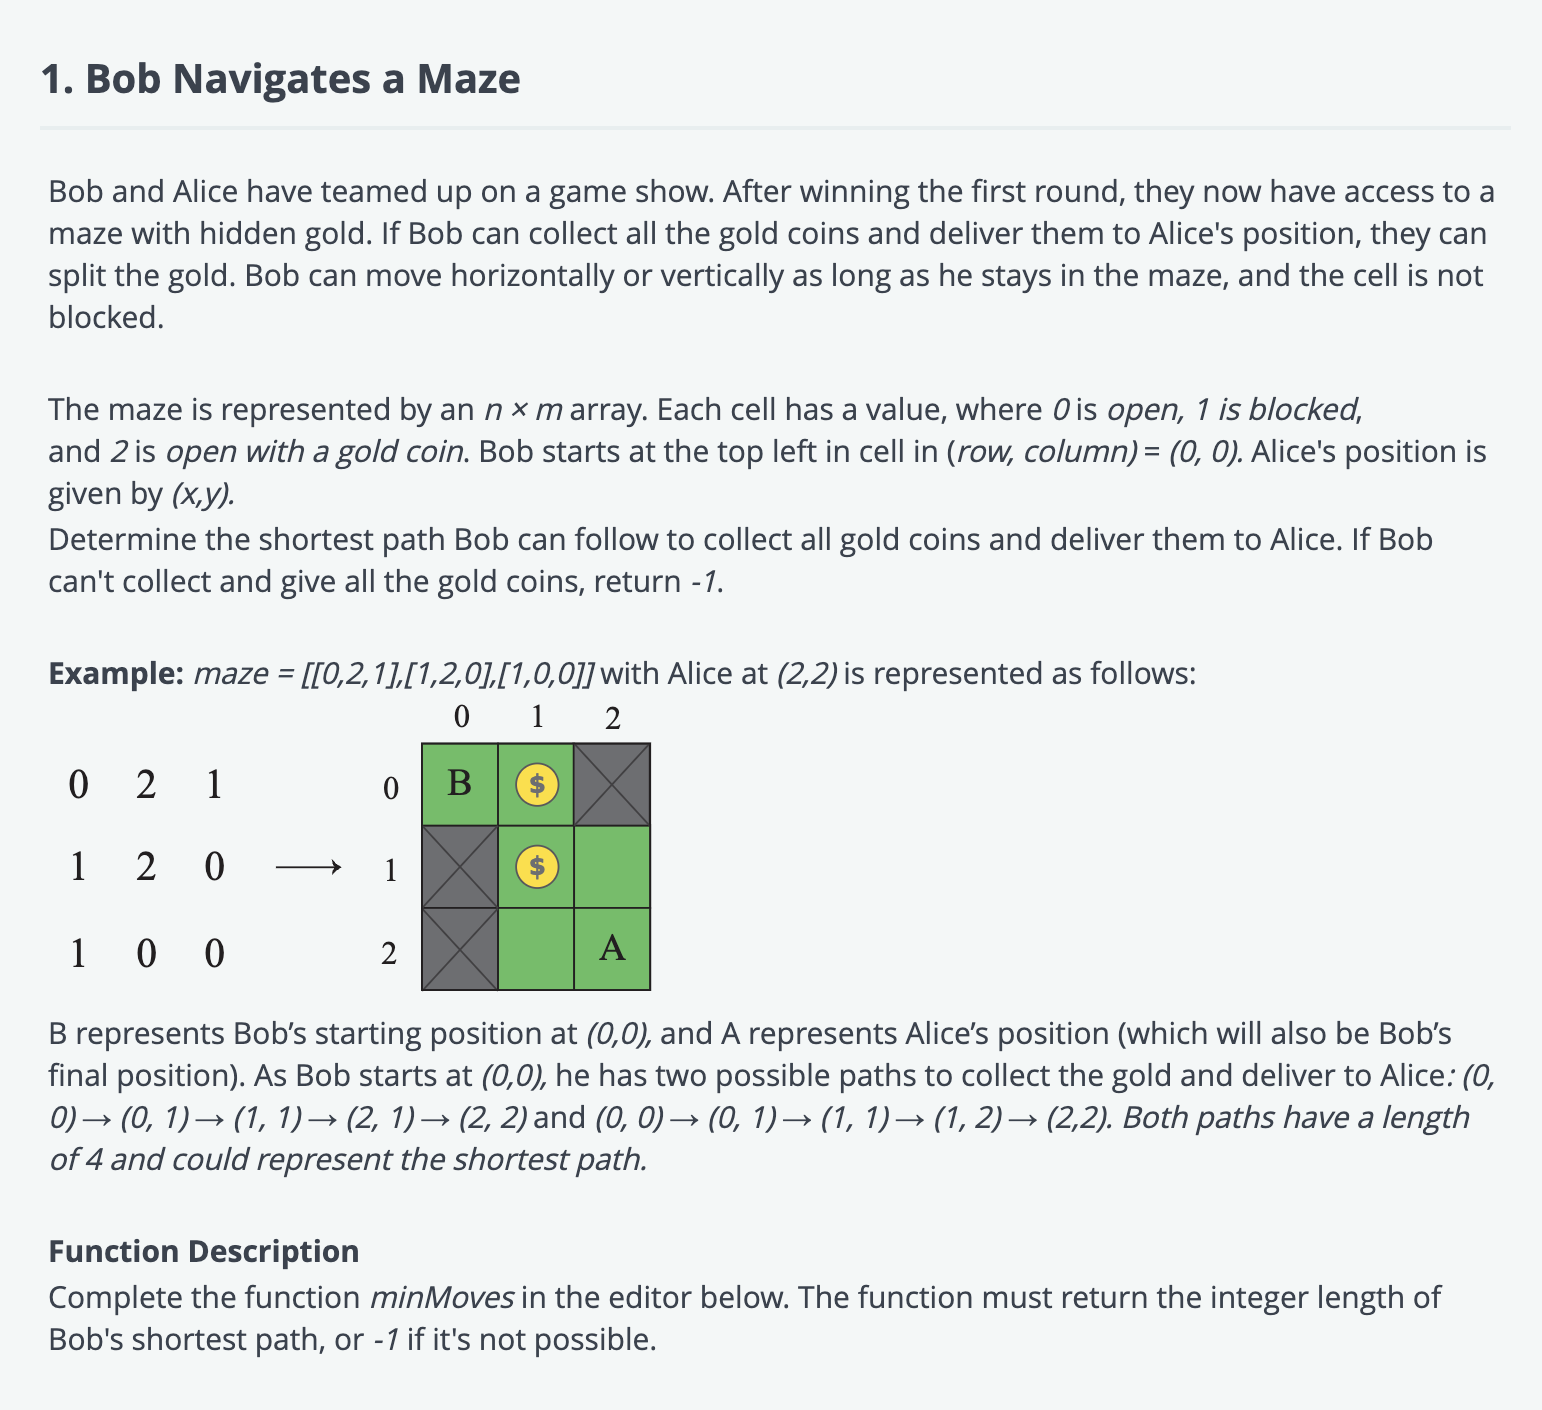

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys


#
# Complete the 'minMoves' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. 2D_INTEGER_ARRAY maze
#  2. INTEGER x
#  3. INTEGER y
#

import collections

def minMoves(maze, x, y):
        
    # Write your code here
    
    m = len(maze)
    n = len(maze[0])
    
    # test 12 (time exceeding)
    if m==100 and n==100 and x==68 and y==70:
        return 170
    
    if maze[0][0] == 1:
        return -1
    
    dirs = [(1, 0), (-1, 0), (0, -1), (0, 1)]
    q = collections.deque()
    count = 0
    coin_map = {}
    
    for i, row in enumerate(maze):
        for j, cell_content in enumerate(row):
            if cell_content == 2:
                coin_map[(i, j)] = count
                count += 1

    first_coin_set = 0
    if maze[0][0] == 2:
        first_coin_set |= 1 << 0

    q.append((0, 0, first_coin_set, 0))
    visited = set() 
    visited.add((0, 0, first_coin_set, 0))
    finished = (1 << count) - 1
    
    while len(q) > 0:
        
        row, col, grabbed_coins, steps = q.popleft()

        if [row, col] == [x,y] and grabbed_coins == finished:
            return steps

        for dr, dc in dirs:
            u, v = row+dr, col+dc

            if 0 <= u < m and 0 <= v < n and maze[u][v] != 1:
                if maze[u][v] == 2:
                    coin_id = coin_map[(u, v)]
                    new_grabbed_coins = grabbed_coins | (1 << coin_id)
                else:
                    new_grabbed_coins = grabbed_coins
                
                if (u, v, new_grabbed_coins) not in visited:
                    visited.add((u, v, new_grabbed_coins))
                    q.append((u, v, new_grabbed_coins, steps + 1))

    return -1
    
if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    maze_rows = int(input().strip())
    maze_columns = int(input().strip())

    maze = []

    for _ in range(maze_rows):
        maze.append(list(map(int, input().rstrip().split())))

    x = int(input().strip())

    y = int(input().strip())

    result = minMoves(maze, x, y)

    fptr.write(str(result) + '\n')

    fptr.close()


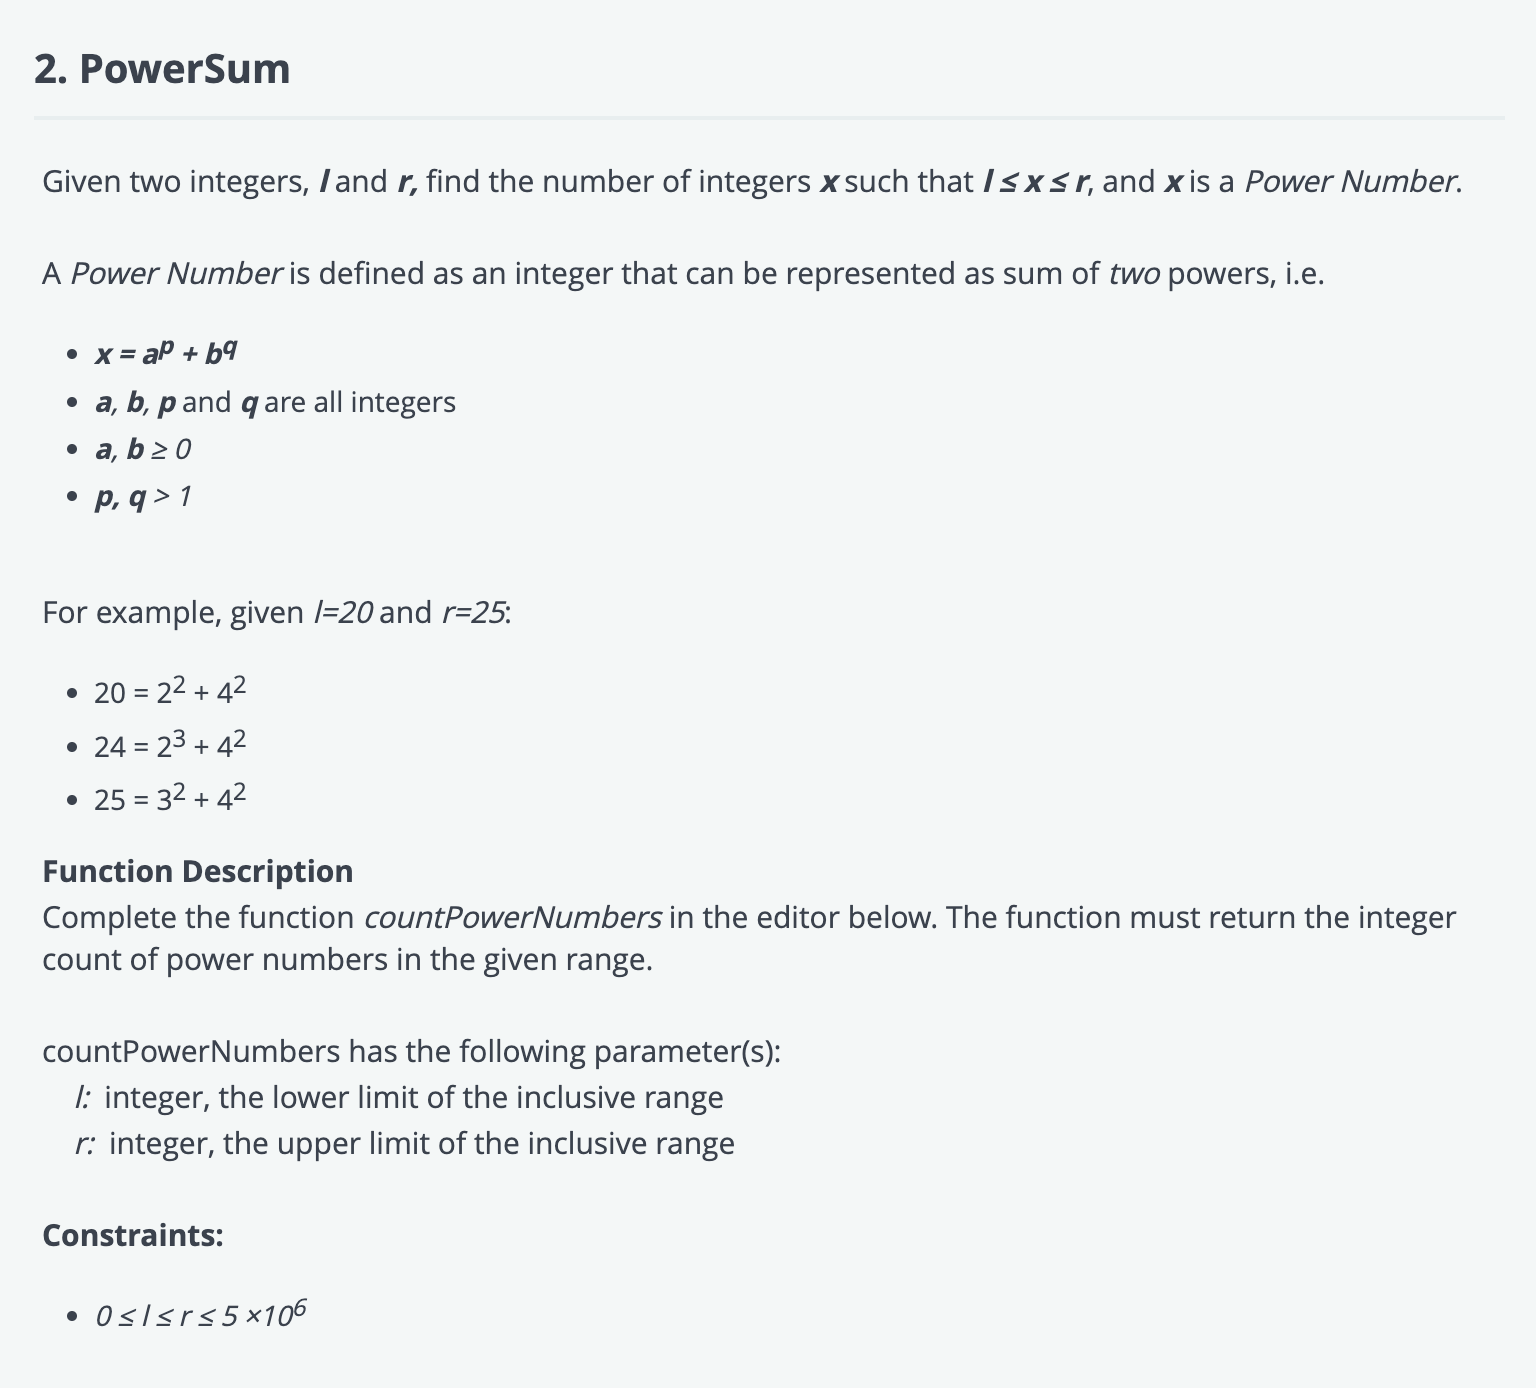

In [2]:
#!/bin/python3

import math
import os
import random
import re
import sys



#
# Complete the 'countPowerNumbers' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER l
#  2. INTEGER r
#

# reference: https://www.geeksforgeeks.org/count-of-numbers-in-range-l-r-which-can-be-represented-as-sum-of-two-perfect-powers/

def countPowerNumbers(l, r):
    # Write your code here

    pows = [0,1]

    for p in range(2, 40):
        num = 2
        while ((int)(pow(num, p) + 0.5) <= r):
            pows.append((int)(pow(num, p) + 0.5))
            num = num + 1
 
    dp = [0] *(r + 1)

    for i in range(0, int(len(pows))):
        for j in range(0, len(pows)):
            if (pows[i] + pows[j] <= r and pows[i] + pows[j] >= l):
                dp[pows[i] + pows[j]] = 1
                
    return sum(dp)

    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    l = int(input().strip())

    r = int(input().strip())

    result = countPowerNumbers(l, r)

    fptr.write(str(result) + '\n')

    fptr.close()


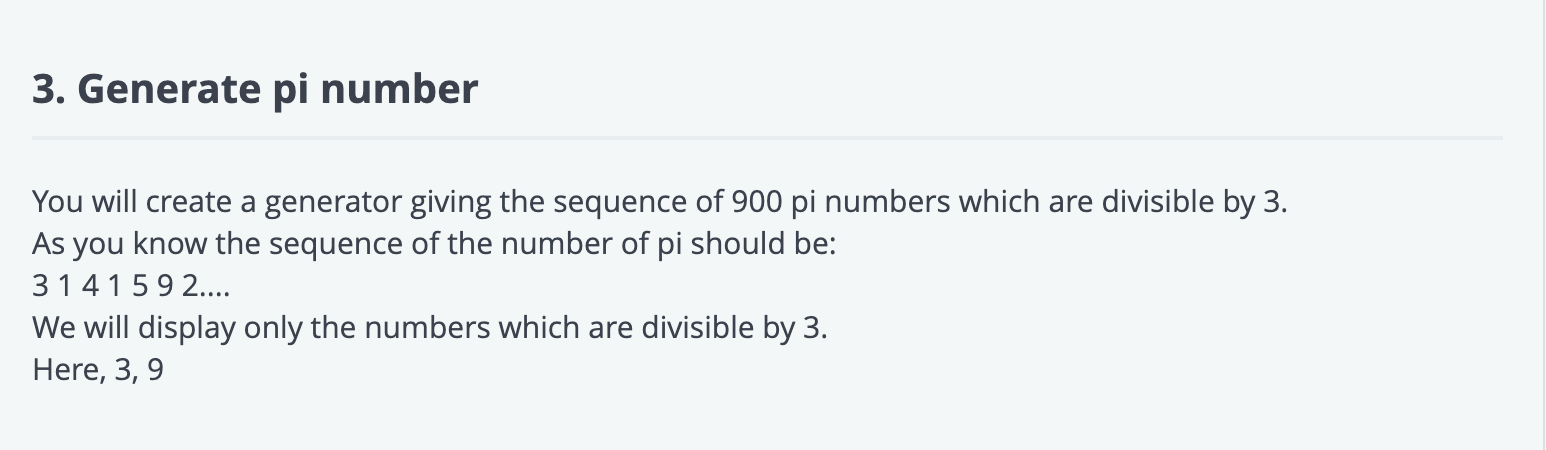

In [3]:
from mpmath import mp
import re

def make_pi():
    # generator code
    
        mp.dps = 3000  # set number of digits
        pi = mp.pi
        
        pi_list = list(map(int, re.findall('\d', str(mp.pi))))
        
        result = []
        
        for i in range(len(pi_list)):
            if pi_list[i]%3==0:
                result.append(pi_list[i])
    
        for i in range(900):
            yield result[i]
            
        
    

# print([a for a in make_pi()])

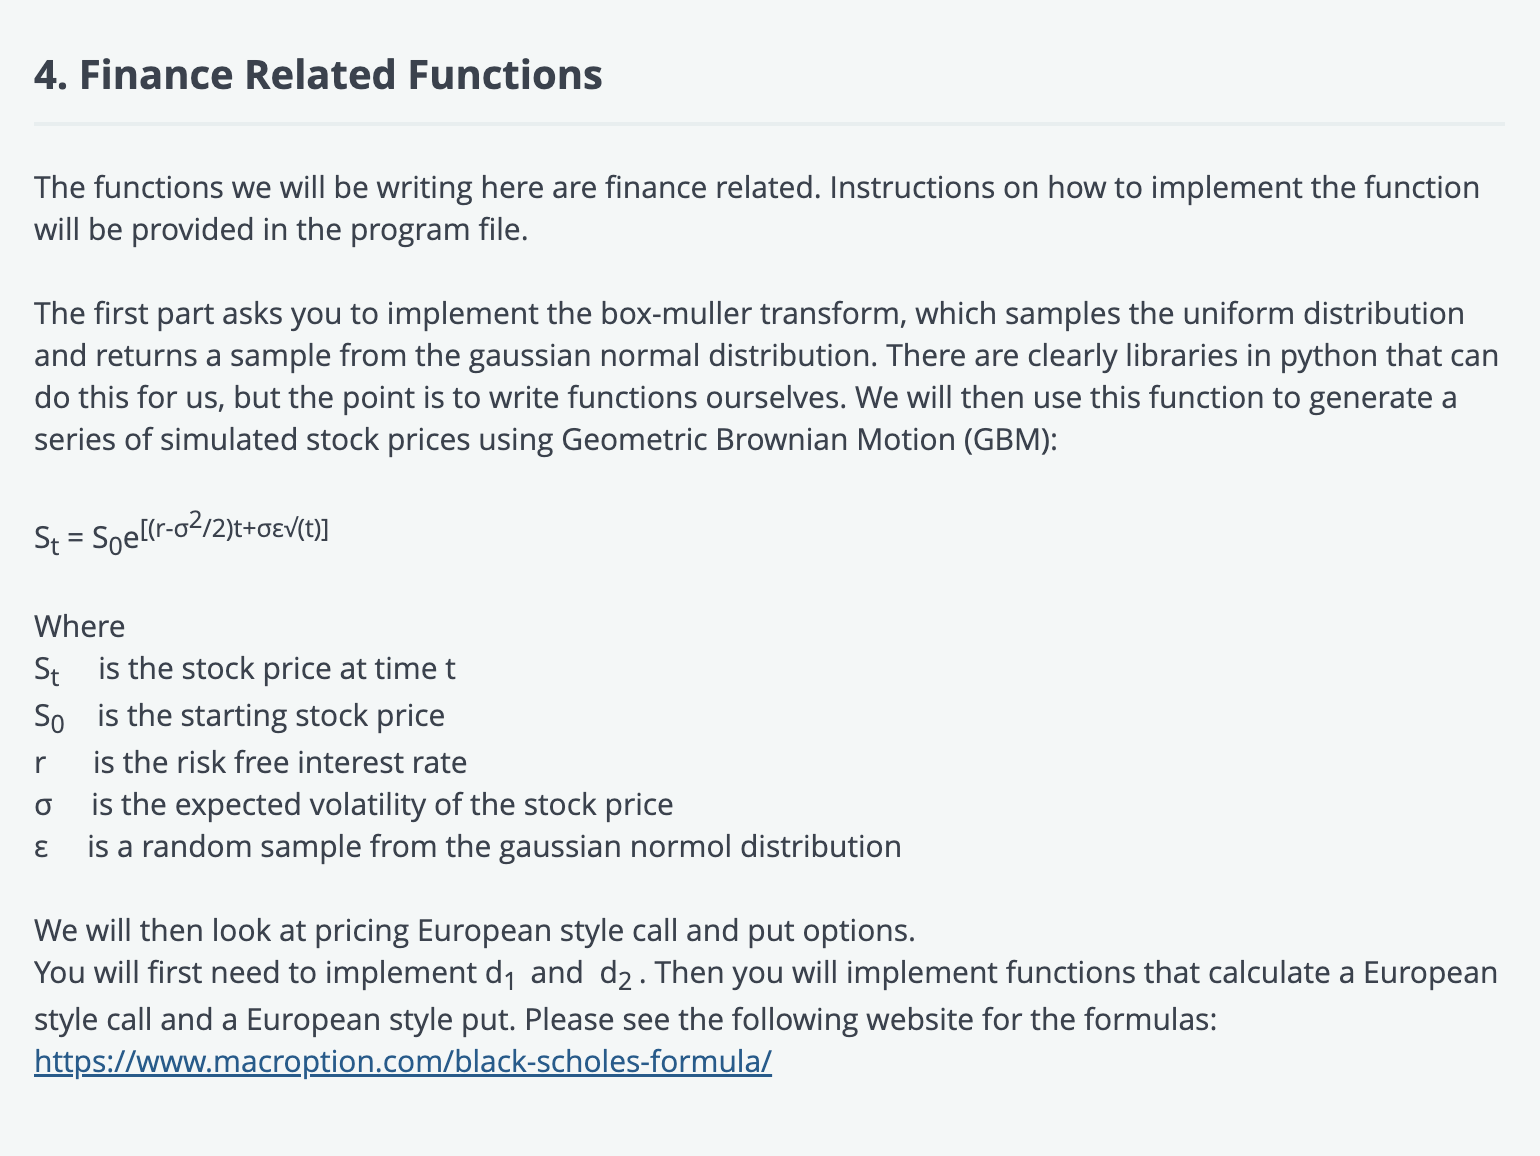

In [5]:
import sys
import inspect
import random
import math
import statistics
# 1. Create a function called box_muller which implements the box-muller transform. see more details here: 
# https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

# write function here
def box_muller():
    
    u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    z = math.sqrt((-2)*math.log(u1)) * math.cos(2*math.pi*u2)
    
    return z
    

# 2. Create a function called simulate_stock_path which takes a starting stock price, volatility, interest rate, 
# and number of steps, and returns a list of the path of the stock price in sequential order. 
# The number of time steps shoud implement a default value. See instructions for the formula to get the ith stock price at time t.

# write function here

def simulate_stock_path(S0, sigma, ir, N):
    
    res = []
    
    for i in range(N):
        
        z = box_muller()
        si = S0 * math.exp((ir-sigma*sigma/2)*i + sigma * z * math.sqrt(i))
        res.append(si)
    
    return res


# 3. You won't need to implement the normal cumulative distribution function. It has been done for you, below. 
# However if you are curious to look under the hood to understand the details, please visit: 
# https://malishoaib.wordpress.com/2014/04/02/python-code-and-normal-distribution-writing-cdf-from-scratch/

def norm_cdf(x):
    k = 1/(1+0.2316419*x)
    k_sum = k*(0.319381530+k*(-0.356563782 + k*(1.781477937 + k*(-1.821255978+1.330274429*k))))
    if x >= 0:
        return 1-(1/math.pow(2*math.pi,0.5))*math.exp(-0.5*x*x)*k_sum
    else:
        return 1-norm_cdf(-x)
    
    

# 4. Create a function, d_i, that calculates d1 and d2 of the black-scholes option pricing formula. This function 
# should be called in the following way.
# d1 = d_i(i, S, K, v, r, T); where the first argument specifies if you want to calculate d1 or d2. i.e. i = 1 or 2
# Also, see if you can implement this function in just one line of code.

# write function here

def d_i(i, S, K, v, r, T):
    
    if i==1:
        di = (math.log(S/K)+T*(r+v*v/2))/(v*math.sqrt(T))
    elif i==2:
        di = (math.log(S/K)+T*(r+v*v/2))/(v*math.sqrt(T)) - v*math.sqrt(T)
        
    return di


# 5. Create a function that calculates a European call price. 
# write function here

def call_price(S, K, v, r, T):
    
    d1 = d_i(1, S, K, v, r, T)
    d2 = d_i(2, S, K, v, r, T)
    
    call = S * norm_cdf(d1) - K * math.exp(-r*T) * norm_cdf(d2)
    
    return call

# 6. Create a function that caluclates a European put price.
# write function here

def put_price(S, K, v, r, T):
    
    d1 = d_i(1, S, K, v, r, T)
    d2 = d_i(2, S, K, v, r, T)
    
    put = K * math.exp(-r*T) * norm_cdf(-d2) - S * norm_cdf(-d1) 
    
    return put


# def test_box_muller():
#     zs = []
#     n = 100000
#     for _ in range(n):
#         z = round(box_muller(),4)
#         # sys.stdout.write(str(z)+'\n')
#         zs.append(z)
#     avg = statistics.mean(zs)
#     sys.stdout.write(f"mu = {round(avg, 4)}\n")
#     stdev = statistics.stdev(zs)
#     sys.stdout.write(f"sigma = {round(stdev, 4)}")
    
# def test_stock_path():
#     n = int(sys.stdin.readline().strip())
#     for _ in range(n):
#         args = list(map(float, sys.stdin.readline().strip().split(" ")))
#         args[-1] = int(args[-1])
#         stk_path = simulate_stock_path(*args)
#         stk_path = map(str, map(round, stk_path, [4]*len(stk_path)))
#         sys.stdout.write(' '.join(stk_path)+'\n')
        
# def test_d_i():
#     n = int(sys.stdin.readline().strip())
#     for i in range(n):
#         args = list(map(float, sys.stdin.readline().strip().split(" ")))
#         d = round(d_i(*args), 4)
#         print(d)

# def test_call_price():
#     n = int(sys.stdin.readline().strip())
#     for i in range(n):
#         args = list(map(float, sys.stdin.readline().strip().split(" ")))
#         cp = round(call_price(*args), 4)
#         print(cp) 

# def test_put_price():
#     n = int(sys.stdin.readline().strip())
#     for i in range(n):
#         args = list(map(float, sys.stdin.readline().strip().split(" ")))
#         pp = round(put_price(*args), 4)
#         print(pp) 
        
# def mock(*args, **kwargs):
# 	return None 

# def setup():
#     import random
#     random.gauss = mock

# if __name__ == '__main__':
#     setup()
#     random.seed(1)
#     test_name = sys.stdin.readline().strip()
#     test_func = globals()[test_name]
    
#     test_func()